# PyCity Schools Analysis

- Your analysis here
  
---

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [140]:
## District Summary
# Calculate the total number of unique schools
school_count = len(school_data_complete["school_name"].unique())

In [141]:
# Calculate the total number of students
student_count = school_data_complete["student_name"].count()


In [142]:
# Calculate the total budget
total_budget = school_data["budget"].sum()


In [143]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()

In [144]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()

In [145]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
# Calculate the percentage of students who passed reading
passing_reading_count = school_data_complete[school_data_complete["reading_score"] >= 70].count()["student_name"]
passing_reading_percentage = passing_reading_count / student_count * 100

In [146]:
# Calculate the overall passing rate
overall_passing_count = school_data_complete[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)].count()["student_name"]
overall_passing_percentage = overall_passing_count / student_count * 100


In [147]:
# Filter the school_data_complete DataFrame to include only the rows where both math and reading scores are greater than or equal to 70
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]

# Calculate the overall passing rate by dividing the number of students who passed both subjects by the total number of students, and then multiplying by 100 to get the percentage
overall_passing_rate = passing_math_reading_count / float(student_count) * 100


In [148]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({
    "Total Schools": [school_count],
    "Total Students": [student_count],
    "Total Budget": [total_budget],
    "Average Math Score": [average_math_score],
    "Average Reading Score": [average_reading_score],
    "% Passing Math": [passing_math_percentage],
    "% Passing Reading": [passing_reading_percentage],
    "% Overall Passing": [overall_passing_percentage]
})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [149]:
## School Summary
# Use the code provided to select the type per school from school_data
school_types = school_data.set_index(["school_name"])["type"]

In [150]:
# Calculate the total student count per school from school_data
per_school_counts = school_data_complete["school_name"].value_counts()

In [151]:
# Calculate the total school budget and per capita spending per school from school_data
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts

C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\2150570767.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]


In [152]:
# Calculate the average test scores per school from school_data_complete
# Calculate the average test scores per school from school_data_complete
per_school_math = school_data_complete.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete.groupby(["school_name"]).mean()["reading_score"]


C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\5368292.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_school_math = school_data_complete.groupby(["school_name"]).mean()["math_score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\5368292.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  per_school_reading = school_data_complete.groupby(["school_name"]).mean()["reading_score"]


In [153]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_passing_math = school_data_complete[school_data_complete["math_score"] >= 70].groupby(["school_name"]).count()["student_name"]
school_students_passing_math = students_passing_math / per_school_counts * 100


In [154]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
students_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70].groupby(["school_name"]).count()["student_name"]
school_students_passing_reading = students_passing_reading / per_school_counts * 100



In [155]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()

# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[(school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100

In [156]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100



In [157]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame({
    "School Type": school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "% Passing Math": school_students_passing_math,
    "% Passing Reading": school_students_passing_reading,
    "% Overall Passing": school_students_passing_math_and_reading
})

# Reset index to bring "school_name" back as a column
per_school_summary.reset_index(inplace=True)
per_school_summary = per_school_summary.rename(columns={'index': 'School Name'})

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
6,Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Highest-Performing Schools (by % Overall Passing)

In [158]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
## Highest-Performing Schools (by % Overall Passing)
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values("% Overall Passing", ascending=False).head(5)


## Bottom Performing Schools (By % Overall Passing)

In [159]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
## Bottom Performing Schools (By % Overall Passing)
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values("% Overall Passing").head(5)


## Math Scores by Grade

In [160]:
## Math Scores by Grade
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
tenth_grader_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
eleventh_grader_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]
twelfth_grader_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_math_scores,
    "10th": tenth_grader_math_scores,
    "11th": eleventh_grader_math_scores,
    "12th": twelfth_grader_math_scores
})

# Reset index to bring "school_name" back as a column
math_scores_by_grade.reset_index(inplace=True)
math_scores_by_grade = math_scores_by_grade.rename(columns={'school_name': 'School Name'})

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade


C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1933170901.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1933170901.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tenth_grader_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1933170901.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eit

,School Name,9th,10th,11th,12th
0,Bailey High School,77.083676,76.996772,77.515588,76.492218
1,Cabrera High School,83.094697,83.154506,82.765560,83.277487
2,Figueroa High School,76.403037,76.539974,76.884344,77.151369
3,Ford High School,77.361345,77.672316,76.918058,76.179963
4,Griffin High School,82.044010,84.229064,83.842105,83.356164
5,Hernandez High School,77.438495,77.337408,77.136029,77.186567
6,Holden High School,83.787402,83.429825,85.000000,82.855422
7,Huang High School,77.027251,75.908735,76.446602,77.225641
8,Johnson High School,77.187857,76.691117,77.491653,76.863248
9,Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [161]:
## Reading Score by Grade 
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
tenth_grader_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
eleventh_grader_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]
twelfth_grader_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grader_reading_scores,
    "11th": eleventh_grader_reading_scores,
    "12th": twelfth_grader_reading_scores
})
# Reset index to bring "school_name" back as a column
reading_scores_by_grade.reset_index(inplace=True)
reading_scores_by_grade = reading_scores_by_grade.rename(columns={'school_name': 'School Name'})
# Minor data wrangling
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\4265399211.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\4265399211.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tenth_grader_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\4265399211.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default t

,School Name,9th,10th,11th,12th
0,Bailey High School,81.303155,80.907183,80.945643,80.912451
1,Cabrera High School,83.676136,84.253219,83.788382,84.287958
2,Figueroa High School,81.198598,81.408912,80.640339,81.384863
3,Ford High School,80.632653,81.262712,80.403642,80.662338
4,Griffin High School,83.369193,83.706897,84.288089,84.013699
5,Hernandez High School,80.866860,80.660147,81.396140,80.857143
6,Holden High School,83.677165,83.324561,83.815534,84.698795
7,Huang High School,81.290284,81.512386,81.417476,80.305983
8,Johnson High School,81.260714,80.773431,80.616027,81.227564
9,Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [162]:
# Establish the spending bins and labels
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

# Create a copy of the school summary
school_spending_df = per_school_summary.copy()

# Preprocess the budget column
school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].replace('[\$,]', '', regex=True).astype(float)

# Categorize spending based on the bins using pd.cut
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"], bins=spending_bins, labels=labels)

# Calculate averages and percentages
spending_summary = school_spending_df.groupby("Spending Ranges (Per Student)").mean()[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]]

# Display the results
spending_summary


C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1995139695.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spending_summary = school_spending_df.groupby("Spending Ranges (Per Student)").mean()[["Average Math Score", "Average Reading Score", "% Passing Math", "% Passing Reading", "% Overall Passing"]]


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [163]:
## Scores by School Size
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]


In [164]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(per_school_summary["Total Students"], size_bins, labels=labels)


In [165]:
# Calculate averages for the desired columns.
# Calculate averages for the desired columns.
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing"]


C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1764338815.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1764338815.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\1764338815.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will defaul

In [166]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "% Passing Math": size_passing_math,
    "% Passing Reading": size_passing_reading,
    "% Overall Passing": size_overall_passing
})

# Display results
size_summary


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [167]:
## Scores by School Type
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"]).mean()["Average Math Score"]
average_reading_score_by_type = per_school_summary.groupby(["School Type"]).mean()["Average Reading Score"]
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"]).mean()["% Passing Math"]
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"]).mean()["% Passing Reading"]
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"]).mean()["% Overall Passing"]


C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\2787570015.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_math_score_by_type = per_school_summary.groupby(["School Type"]).mean()["Average Math Score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\2787570015.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_reading_score_by_type = per_school_summary.groupby(["School Type"]).mean()["Average Reading Score"]
C:\Users\Juan\AppData\Local\Temp\ipykernel_27380\2787570015.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

In [168]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "% Passing Math": average_percent_passing_math_by_type,
    "% Passing Reading": average_percent_passing_reading_by_type,
    "% Overall Passing": average_percent_overall_passing_by_type
})

# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


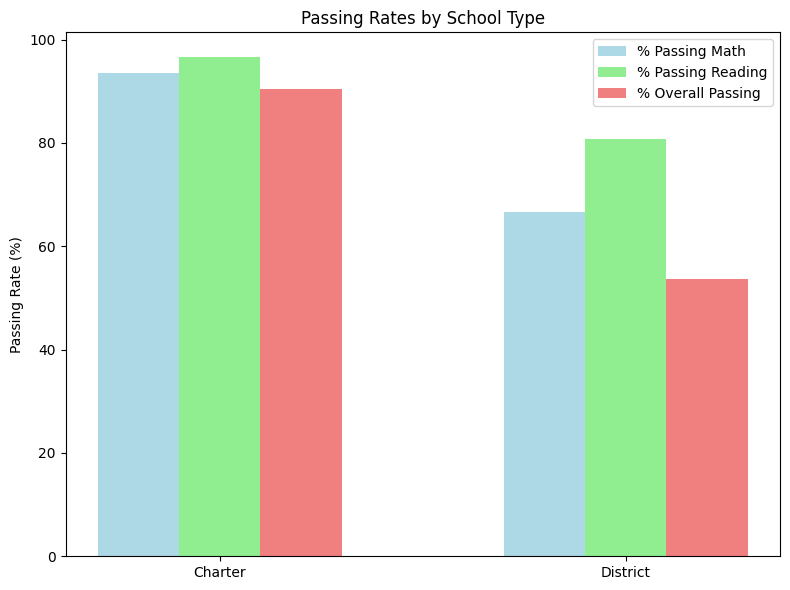

In [169]:
# THE GOOD BAR CHART Plot grouped bar chart for passing rates by school type
fig, ax = plt.subplots(figsize=(8, 6))
N = len(type_summary.index)
ind = np.arange(N)
width = 0.2
rects1 = ax.bar(ind, type_summary['% Passing Math'], width, color='lightblue', label='% Passing Math')
rects2 = ax.bar(ind + width, type_summary['% Passing Reading'], width, color='lightgreen', label='% Passing Reading')
rects3 = ax.bar(ind + 2*width, type_summary['% Overall Passing'], width, color='lightcoral', label='% Overall Passing')
ax.set_ylabel('Passing Rate (%)')
ax.set_title('Passing Rates by School Type')
ax.set_xticks(ind + width)
ax.set_xticklabels(type_summary.index)
ax.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [170]:

# Merge per_school_summary with math_scores_by_grade on School Name
math_scores_by_grade = pd.merge(math_scores_by_grade, per_school_summary[['School Name', 'School Type']], on='School Name', how='left')

print(math_scores_by_grade.columns)

Index(['School Name', '9th', '10th', '11th', '12th', 'School Type'], dtype='object')


In [171]:
print(per_school_summary.columns)


Index(['School Name', 'School Type', 'Total Students', 'Total School Budget',
       'Per Student Budget', 'Average Math Score', 'Average Reading Score',
       '% Passing Math', '% Passing Reading', '% Overall Passing',
       'School Size'],
      dtype='object')


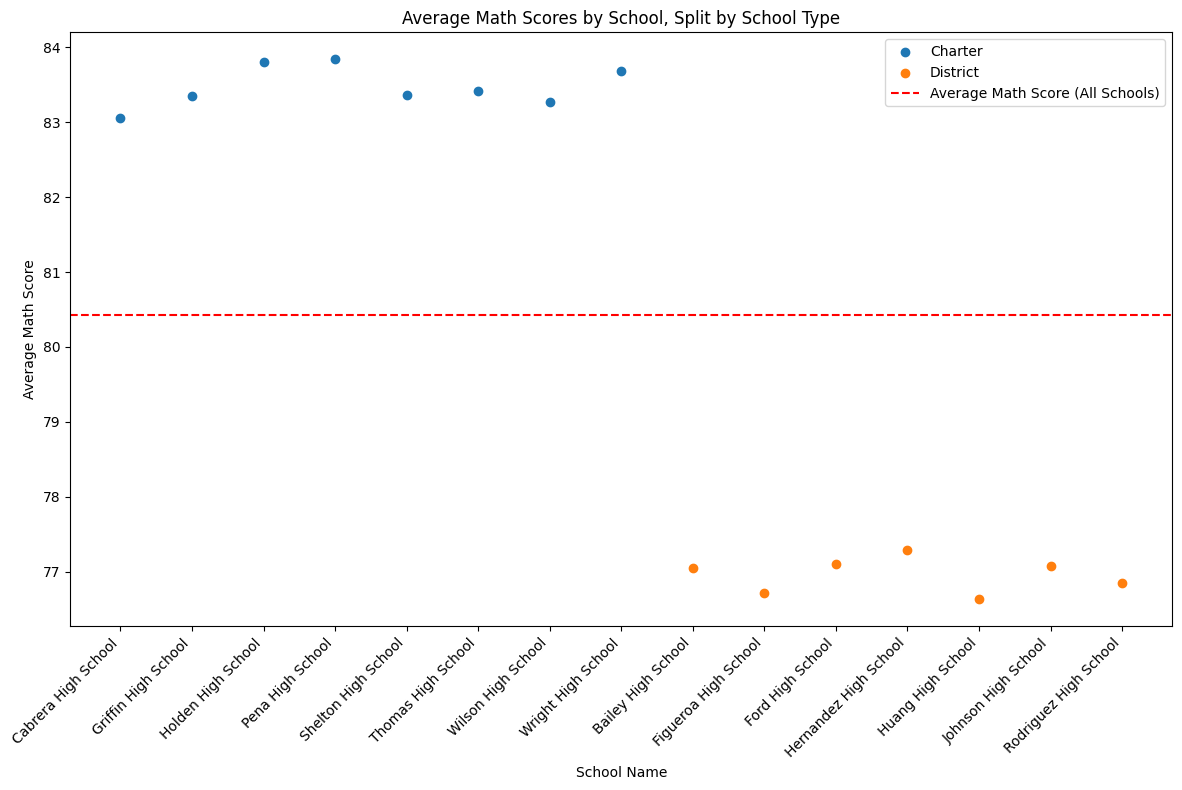

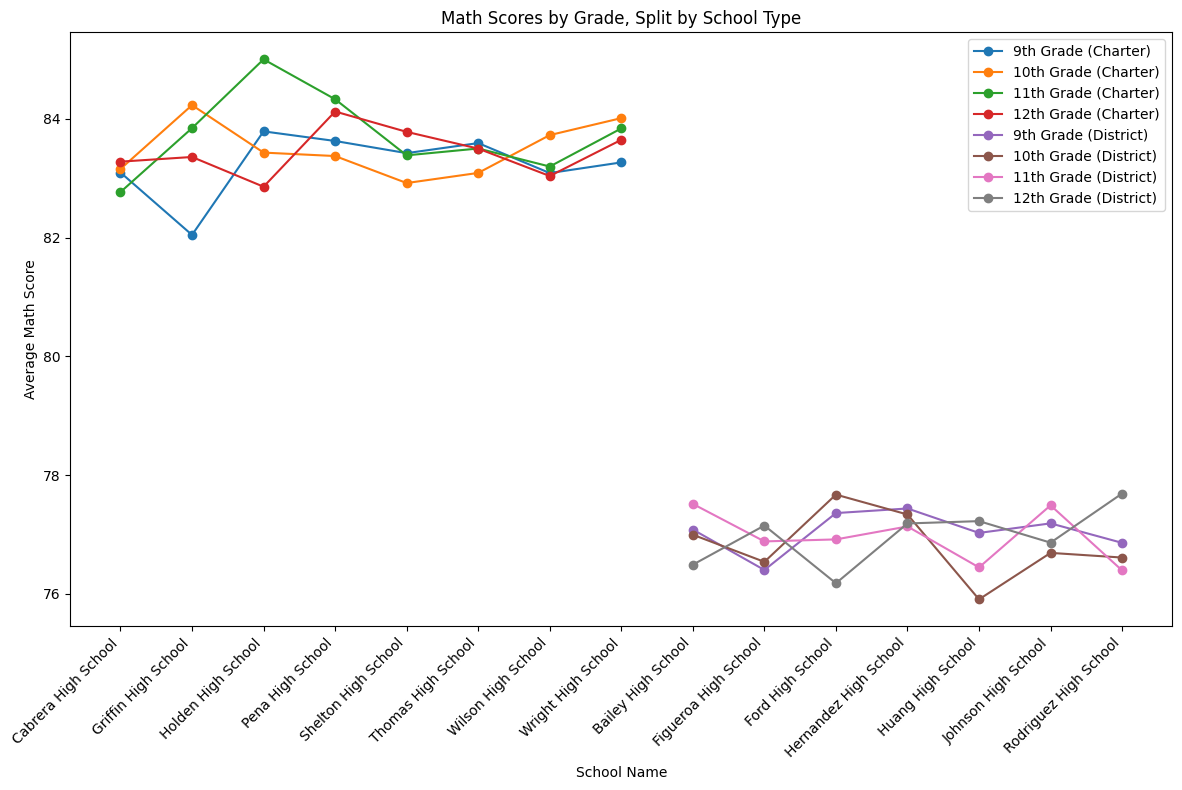

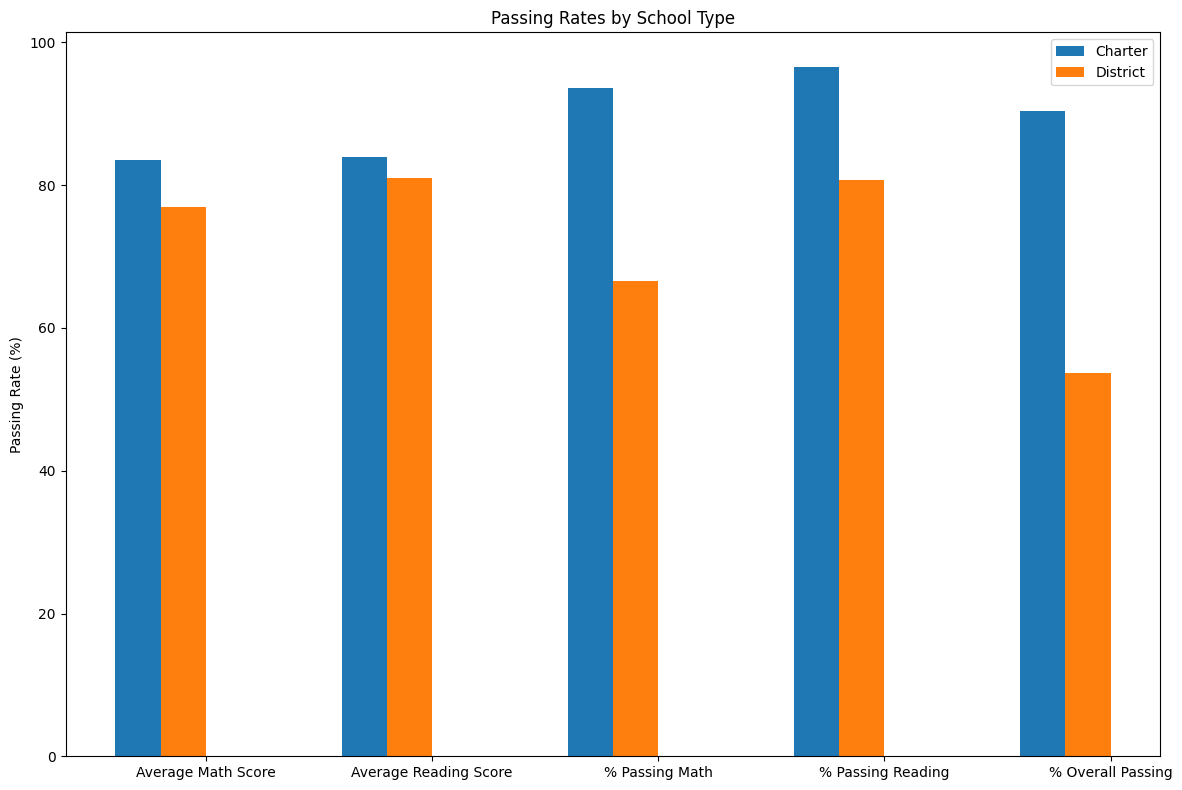

In [172]:

def generate_analysis(district_summary, per_school_summary, top_schools, bottom_schools, math_scores_by_grade, reading_scores_by_grade, type_summary):
    # Plot bar chart for average math scores by school with an average line, split by school type
    plt.figure(figsize=(12, 8))

    # Plot average math scores for each school type
    for school_type in type_summary.index:
        school_data = per_school_summary[per_school_summary["School Type"] == school_type]
        plt.scatter(school_data["School Name"], school_data["Average Math Score"], label=school_type)

    # Add average line for all schools
    plt.axhline(y=per_school_summary["Average Math Score"].mean(), color='red', linestyle='--', label='Average Math Score (All Schools)')

    # Add labels and title
    plt.title('Average Math Scores by School, Split by School Type')
    plt.xlabel('School Name')
    plt.ylabel('Average Math Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot line plot for passing rates by grade, split by school type
    plt.figure(figsize=(12, 8))

    # Plot math scores by grade for each school type
    for school_type in type_summary.index:
        school_data = math_scores_by_grade[math_scores_by_grade["School Type"] == school_type]
        for grade in ["9th", "10th", "11th", "12th"]:
            plt.plot(school_data['School Name'], school_data[grade], label=f'{grade} Grade ({school_type})', marker='o')

    # Add labels and title
    plt.title('Math Scores by Grade, Split by School Type')
    plt.xlabel('School Name')
    plt.ylabel('Average Math Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot grouped bar chart for passing rates by school type, split by school type
    plt.figure(figsize=(12, 8))

    # Plot passing rates by school type
    for i, school_type in enumerate(type_summary.index):
        plt.bar([x + i * 0.2 for x in range(len(type_summary.columns))], type_summary.loc[school_type], width=0.2, label=school_type)

    # Add labels and title
    plt.ylabel('Passing Rate (%)')
    plt.title('Passing Rates by School Type')
    plt.xticks([r + 0.3 for r in range(len(type_summary.columns))], type_summary.columns)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
generate_analysis(district_summary, per_school_summary, top_schools, bottom_schools, math_scores_by_grade, reading_scores_by_grade, type_summary)
